# 9FR_vocab_go_cancer_normal_crmgenes.ipynb


6/16/2021

similar to dk Fig 6A combinatorl motif go stuff 

update 7/14/21

For the MC/MM/KC/SCC GOTerm plot, we're almost there -- can you get rid of 
- 'macromolecule catabolic process' ,
- 'lymphocyte proliferation' , GO:0046651
- 'regulation of epithelial cell differentiation'
- 'establishment of vesicle localization'?


update 8/6/2021 - get go terms for both cancer and normal tissues for all go terms

update 8/10/2021 - split go mm vs scc


update 09/05/2021 - 

I think we want just the cell state-specific synergistic DMCs for KC vs SCC:
HMGA1::KLF5 KCD6   
PRDM1::RORA KCD6
EGR2::FOSL2 KCD6  
KLF5::MAFK KCD6 
EGR2::RORA KCD6 
SP1::ZNF770 A431
SP1::ZBTB14 A431
ARNT::SP1 A431
And then these are the only melanoma-specific DMCs
EGR2::NFE2L1  COLO
NFE2L1::NR3C1 COLO
SOX10::SOX13  COLO
# plots

# 1 TF expression by tissue

# 2. Dot plot to connect cooperative TFs
# 3. go terms associated with target genes of cooperative TFS

for all KC and MC SCC and MM



In [2]:
library(tidyverse)
library(pheatmap)

library(RColorBrewer)
library(clusterProfiler)
library(ReactomePA)
library(annotate)
library( org.Hs.eg.db ) 
library(AnnotationDbi) 
library(Biobase)


save_pheatmap_png <- function(x, filename, width=1200, height=1000, res = 200) {
  png(filename, width = width, height = height, res = res)
  grid::grid.newpage()
  grid::grid.draw(x$gtable)
  dev.off()
}
save_pheatmap_pdf <- function(x, filename, width=7, height=7) {
   stopifnot(!missing(x))
   stopifnot(!missing(filename))
   pdf(filename, width=width, height=height)
   grid::grid.newpage()
   grid::grid.draw(x$gtable)
   dev.off()
}

In [3]:
save_prefix ='../data/processed/fig7_vocab_go/cancer_normal/'

In [4]:
tissue_colors = read.csv( '../data/processed/fig3_footprinting/tissue_colors.csv',stringsAsFactors=F)
# tissue_colors

In [5]:
tissue_colors = rbind(tissue_colors,c('MM','#7D639E'),c('SCC','#DDB1AD'))
tissue_colors
#

tissue,color
<chr>,<chr>
Airway,#4A195D
Astrocytes,#A8EAFF
Bladder,#C2A7D2
Colon,#F5AF1A
Esophageal,#FFDA89
GDSD0,#240201
GDSD3,#4E0A05
GDSD6,#A22633
GM12878,#8F99AC



# 1 TF expression by tissue

# 2. Dot plot to connect cooperative TFs


In [6]:
# add 09/05/2021

vocab_to_include = c('HMGA1::KLF5','PRDM1::RORA','EGR2::FOSL2', 'KLF5::MAFK','EGR2::RORA',
                    'SP1::ZNF770','SP1::ZBTB14','ARNT::SP1','EGR2::NFE2L1','NFE2L1::NR3C1','SOX10::SOX13')



In [7]:
vocab_df = read.csv('../data/processed/mpra/results_df_piv_match_count.csv',
                                     stringsAsFactor=F)
tissue_order = c('Melanocytes','MM','GDSD6','SCC')
cancer_vocab_df = vocab_df%>%
    filter(vocab %in% vocab_to_include)%>%
    filter(tissue%in% tissue_order)%>%
    mutate(tissue = factor(tissue, levels=tissue_order))
cancer_vocab_df_coop = cancer_vocab_df%>%
    filter(consensus_class=='AND')%>%
    arrange(tissue,vocab)%>%
    mutate(index=row_number())%>%
    left_join(tissue_colors, by='tissue')
str(cancer_vocab_df_coop)
cancer_vocab_df_coop1 = cancer_vocab_df_coop[,c("tf1",'index','tissue','color')]
colnames(cancer_vocab_df_coop1) = c("tf_name",'number','tissue','color')
cancer_vocab_df_coop2 = cancer_vocab_df_coop[,c("tf2",'index','tissue','color')]
colnames(cancer_vocab_df_coop2) = c("tf_name",'number','tissue','color')
cancer_vocab_df_long = rbind(cancer_vocab_df_coop1, cancer_vocab_df_coop2)
cancer_vocab_df_long$score = .5
str(cancer_vocab_df_long)

Warning message:
“Column `tissue` joining factor and character vector, coercing into character vector”


'data.frame':	11 obs. of  12 variables:
 $ X              : int  31 167 203 26 33 67 129 185 5 217 ...
 $ vocab          : chr  "EGR2::NFE2L1" "NFE2L1::NR3C1" "SOX10::SOX13" "EGR2::FOSL2" ...
 $ tissue         : chr  "MM" "MM" "MM" "GDSD6" ...
 $ mpra_tissue    : chr  "COLO" "COLO" "COLO" "KCD6" ...
 $ class          : chr  "other|other|AND|OR|other|OR|AND|other|other|other" "AND|other|other|AND|LEADING_A|OR|other|other|other|XOR" "other|OR|AND|other|other|other|AND|other|other|other" "AND|LEADING_A|other|other|OR|other|LEADING_A|other|other|AND" ...
 $ instance       : chr  "1|10|2|3|4|5|6|7|8|9" "1|10|2|3|4|5|6|7|8|9" "1|10|2|3|4|5|6|7|8|9" "1|10|2|3|4|5|6|7|8|9" ...
 $ count          : int  10 10 10 10 10 10 10 10 10 10 ...
 $ consensus_class: chr  "AND" "AND" "AND" "AND" ...
 $ tf1            : chr  "EGR2" "NFE2L1" "SOX10" "EGR2" ...
 $ tf2            : chr  "NFE2L1" "NR3C1" "SOX13" "FOSL2" ...
 $ index          : int  1 2 3 4 5 6 7 8 9 10 ...
 $ color          : chr  "#7D639E" "#7

In [8]:
tf_order = c()
for (tissue in tissue_order){
    print(tissue)
    tfs_to_add = unique(cancer_vocab_df_long[cancer_vocab_df_long$tissue==tissue,]$tf_name)
    print(length(tfs_to_add))
    tfs_to_add = tfs_to_add[!(tfs_to_add %in% tf_order)]
    print(length(tfs_to_add))
    tf_order = c(tf_order, tfs_to_add)
    print(length(tf_order))
}
length(unique(cancer_vocab_df_long$tf_name))
length(tf_order)

[1] "Melanocytes"
[1] 0
[1] 0
[1] 0
[1] "MM"
[1] 5
[1] 5
[1] 5
[1] "GDSD6"
[1] 7
[1] 6
[1] 11
[1] "SCC"
[1] 4
[1] 4
[1] 15


[1] 15

[1] 15

In [9]:
tf_tissue_annon = cancer_vocab_df_long%>%
    dplyr::select(tf_name,tissue)%>%
    arrange(tf_name)%>%
    distinct()%>%
    group_by(tf_name)%>%
    summarise(tissue_groups = paste0(tissue, collapse = "|")) %>%
    column_to_rownames('tf_name')
tf_tissue_annon

,tissue_groups
,<chr>
ARNT,SCC
EGR2,MM|GDSD6
FOSL2,GDSD6
HMGA1,GDSD6
KLF5,GDSD6
MAFK,GDSD6
NFE2L1,MM
NR3C1,MM
PRDM1,GDSD6


In [10]:
# cancer_vocab_df_spread = cancer_vocab_df_long%>%
#     dplyr::select(tf_name, score,number)%>%
#     pivot_wider(names_from = tf_name, values_from = score)%>%
#     column_to_rownames("number")
# cancer_vocab_df_spread[is.na(cancer_vocab_df_spread)] = 0
# dim(cancer_vocab_df_spread)
# p = pheatmap(cancer_vocab_df_spread,
#         cluster_row=F)
# tf_order = colnames(cancer_vocab_df_spread)[p$tree_col[['order']]]

In [11]:
rna_tpm_file_tissue = '../data/interim/rna/tissue_tpm_sym.csv'
rna_df_tissue = read.csv(rna_tpm_file_tissue, row.names=1,stringsAsFactors=F,check.names = FALSE)
all_genes = rownames(rna_df_tissue)
rna_df_tissue = rna_df_tissue[tf_order,]
rna_df_tissue$SCC = rowMeans(rna_df_tissue[,c('A431-CTRLi','CAL27-CTRLi','SCC13-CTRLi')])
rna_df_tissue$MM = rowMeans(rna_df_tissue[,c('COLO_SCR_DMSO','SKMEL5_SCR_DMSO','WM_SCR_DMSO')])
rna_df_tissue_log = log2(rna_df_tissue+1)
rna_df_tissue_norm = as.data.frame(scale(rna_df_tissue_log, center = TRUE, scale = TRUE))
rna_df_tissue_norm[rna_df_tissue_norm>2] = 2
rna_df_tissue_norm[rna_df_tissue_norm < -2] = -2
rna_df_tissue_log[rna_df_tissue_log>5] = 5
head(rna_df_tissue_norm)

,A431-CTRLi,A431-p63i,Airway,Astrocytes,Bladder,CAL27-CTRLi,CAL27-p63i,COLO_SCR_DMSO,COLO_SCR_PLX,COLO_shMITF_DMSO,⋯,SKMEL5_shMITF-DMSO,SKMEL5_shMITF_PLX,Thyroid,Uterine,WM_SCR_DMSO,WM_SCR_PLX,WM_shMITF_DMSO,WM_shMITF_PLX,SCC,MM
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
EGR2,-0.1847538,-0.8316228,-1.2530104,-1.0649370,-1.3367856,-0.7372555,-0.6409688,-0.9940976,-1.2315461,-0.7695050,⋯,-1.1606471,-1.0448783,-1.2743556,-1.3201637,-0.3211545,-0.6390584,-0.008400501,-0.6925471,-0.6134114,-0.7612483
NFE2L1,1.0552870,0.9249831,0.9526259,1.0755963,0.9609816,0.6771078,0.9629666,1.2499203,1.3140100,1.0795618,⋯,1.2707224,1.1118594,0.6770621,1.0239002,1.2496797,1.2398217,1.319434493,1.2376178,0.8262961,1.2302883
SOX10,-1.2732921,-1.3914715,-1.3007596,-1.2090289,-1.3159342,-1.1886969,-1.5078926,1.0992663,1.4746255,0.9535499,⋯,1.4331698,1.5470134,-1.3682550,-1.3261436,1.2528526,1.6039373,1.394006454,1.6776109,-1.3242764,1.2160718
NR3C1,1.1899898,1.3837522,1.2589916,1.5060571,1.2325826,1.3456367,1.4282778,0.9745475,1.2550870,0.9236898,⋯,0.8765094,1.2086026,1.2433560,1.3179460,1.5653414,1.7166478,1.495382906,1.7852267,1.2076918,1.2607042
SOX13,-0.5215323,-0.4591988,-0.6366594,-0.8838094,-0.7523400,-0.6069027,-0.9814161,-0.4949642,-0.2792759,-0.5744838,⋯,-0.7022870,-0.4674964,-0.3508730,-0.4568457,-0.3195233,-0.6669469,-0.778309236,-0.8873053,-0.6061999,-0.5295312
HMGA1,1.8779913,1.8345623,2.0000000,2.0000000,2.0000000,2.0000000,1.6293488,2.0000000,1.5585985,2.0000000,⋯,1.9549238,1.7163620,2.0000000,2.0000000,1.9685036,1.4087281,1.875189627,1.1616275,2.0000000,2.0000000


In [12]:
tissue_colors_filt = filter(tissue_colors, tissue %in%unique(cancer_vocab_df_long$tissue))
tissue_colors_filt

tissue,color
<chr>,<chr>
GDSD6,#A22633
MM,#7D639E
SCC,#DDB1AD


In [13]:
length(tf_order)
print(tf_order)

[1] 15

 [1] "EGR2"   "NFE2L1" "SOX10"  "NR3C1"  "SOX13"  "HMGA1"  "KLF5"   "PRDM1" 
 [9] "FOSL2"  "RORA"   "MAFK"   "ARNT"   "SP1"    "ZBTB14" "ZNF770"


In [27]:
# # manual 
# tf_order_manual = c('ARID5B','LEF1',"NFE2L1" ,"ZBTB49" ,"TBX15" , "NR3C1" ,
#                     "STAT1",  "SOX10",  "SOX13",  "NFATC4", "HBP1",   "EGR2"  ,"EN2" ,"SP4" ,   
#                     "SP1" ,"ZNF770","ZBTB17", "ZBTB14", "TFDP1" , "MAZ"  ,  "KLF4"  , "KLF5"  , "KLF16" ,"TFAP2C" ,"EGR1" ,  "SP3"  ,  "E2F6"  , "ARNT" 
#             )
# length(unique(tf_order_manual))
# tf_order = tf_order_manual
# tf_order[!(tf_order %in% tf_order_manual)]

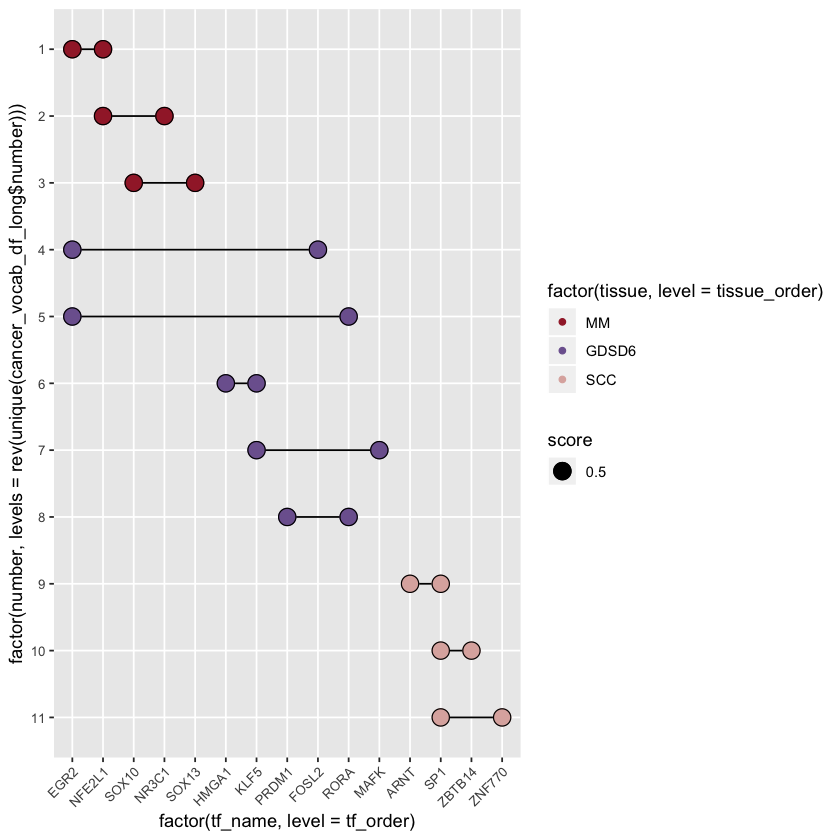

In [33]:
p = ggplot(cancer_vocab_df_long, aes(x=factor(tf_name,level=tf_order),y= factor(number, levels=rev(unique(cancer_vocab_df_long$number))),
                                          color=factor(tissue, level=tissue_order)))+
    geom_line(aes(group = factor(number)),color='black')+geom_point(aes(size=score))+ 
    scale_color_manual(values=tissue_colors_filt$color)+
    geom_point(aes(size=score),colour="black",pch=21)+
    theme(axis.text.y = element_text(size=8),
          axis.text.x = element_text(size=8, angle = 45,hjust=1))
p 
ggsave(file = paste0(save_prefix, "cancer_vocab_tissue_pairs.eps"),height=3.5, width=7)
#

In [14]:
rna_df_tissue['SP4',tissue_colors_filt$tissue]#c('GDSD0','GDSD3','GDSD6','SCC','A431-CTRLi','CAL27-CTRLi','SCC13-CTRLi')]

,GDSD6,MM,SCC
,<dbl>,<dbl>,<dbl>
NA,NA,NA,NA


pdf 
  2

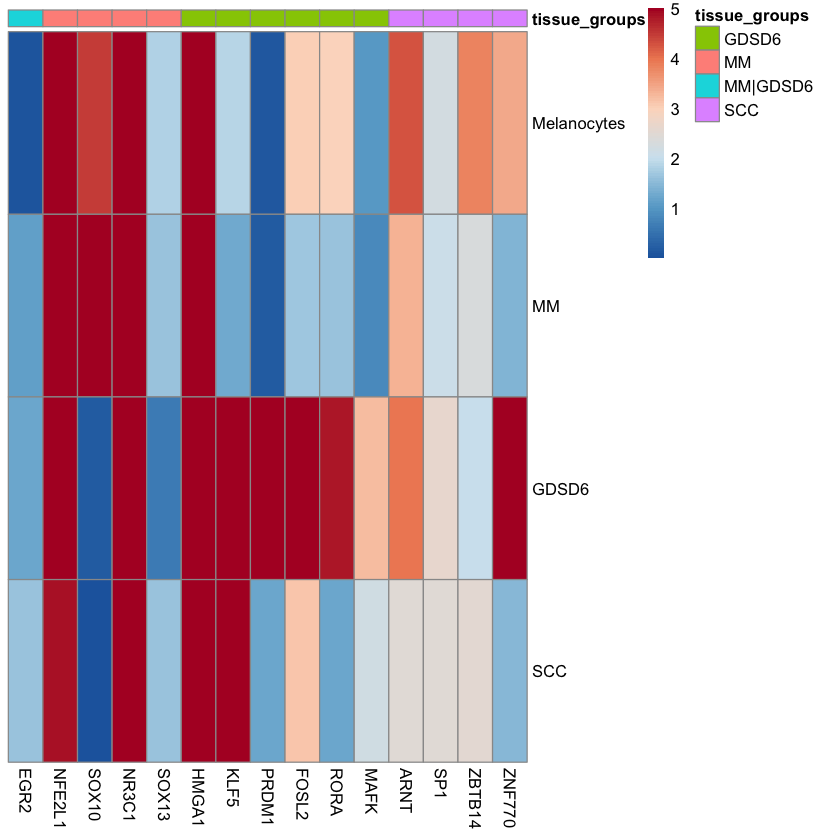

In [34]:
p_genexp = pheatmap(t(rna_df_tissue_log[tf_order,tissue_order]),
                    color = colorRampPalette(rev(brewer.pal(n =6, name ="RdBu")))(100),
                    annotation_col = tf_tissue_annon,
                    cluster_rows=F,cluster_cols=F)
save_pheatmap_pdf(p_genexp, paste0(save_prefix, 'camcer_vocab_rna_heatmap.pdf'),  height=2,width=7) 

# 2 B split MM and MC vs SCC and KC

In [15]:
mm_mc = c('Melanocytes','MM')
tf_mm_mc = filter(cancer_vocab_df_long, tissue %in% mm_mc)$tf_name
tf_order_mm_mc = tf_order[tf_order %in% tf_mm_mc]
tissue_order_mm_mc = tissue_order[tissue_order %in% mm_mc]
tf_tissue_annon_mm_mc = cancer_vocab_df_long%>%
    filter( tissue %in% mm_mc)%>%
    dplyr::select(tf_name,tissue)%>%
    arrange(tf_name)%>%
    distinct()%>%
    group_by(tf_name)%>%
    summarise(tissue_groups = paste0(tissue, collapse = "|")) %>%
    column_to_rownames('tf_name')


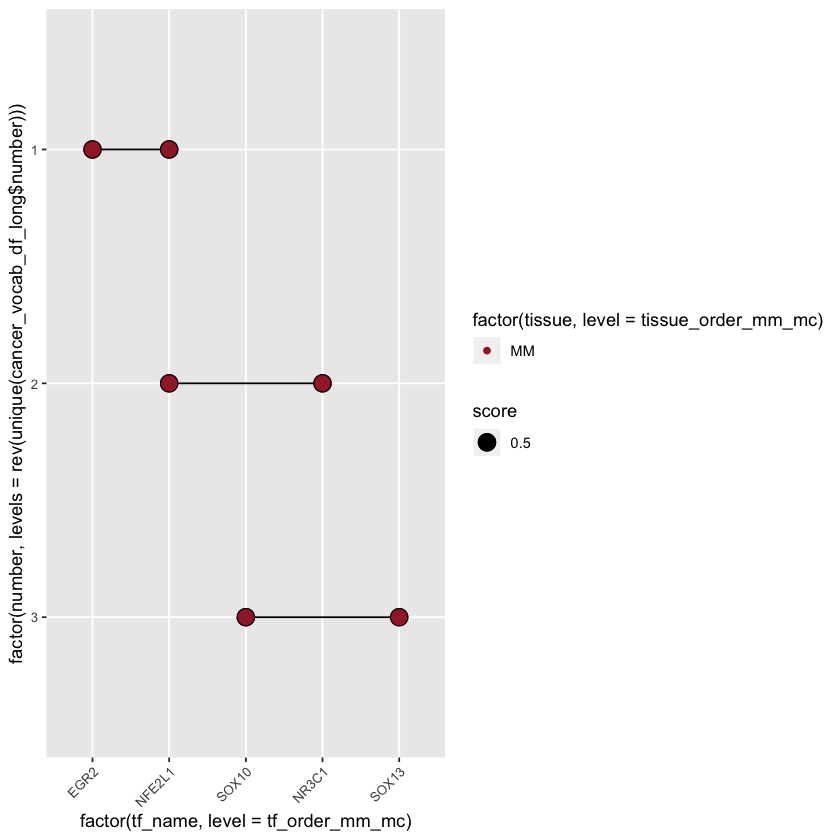

In [16]:
# cancer_vocab_df_long
p = ggplot(cancer_vocab_df_long %>% filter(tissue %in% mm_mc), 
           aes(x=factor(tf_name,level=tf_order_mm_mc),y= factor(number, levels=rev(unique(cancer_vocab_df_long$number))),
                                          color=factor(tissue, level=tissue_order_mm_mc)))+
    geom_line(aes(group = factor(number)),color='black')+geom_point(aes(size=score))+ 
    scale_color_manual(values=tissue_colors_filt$color)+
    geom_point(aes(size=score),colour="black",pch=21)+
    theme(axis.text.y = element_text(size=8),
          axis.text.x = element_text(size=8, angle = 45,hjust=1))
p 
ggsave(file = paste0(save_prefix, "cancer_vocab_tissue_pairs_mm_mc.eps"),height=2.2, width=6)
#

pdf 
  2

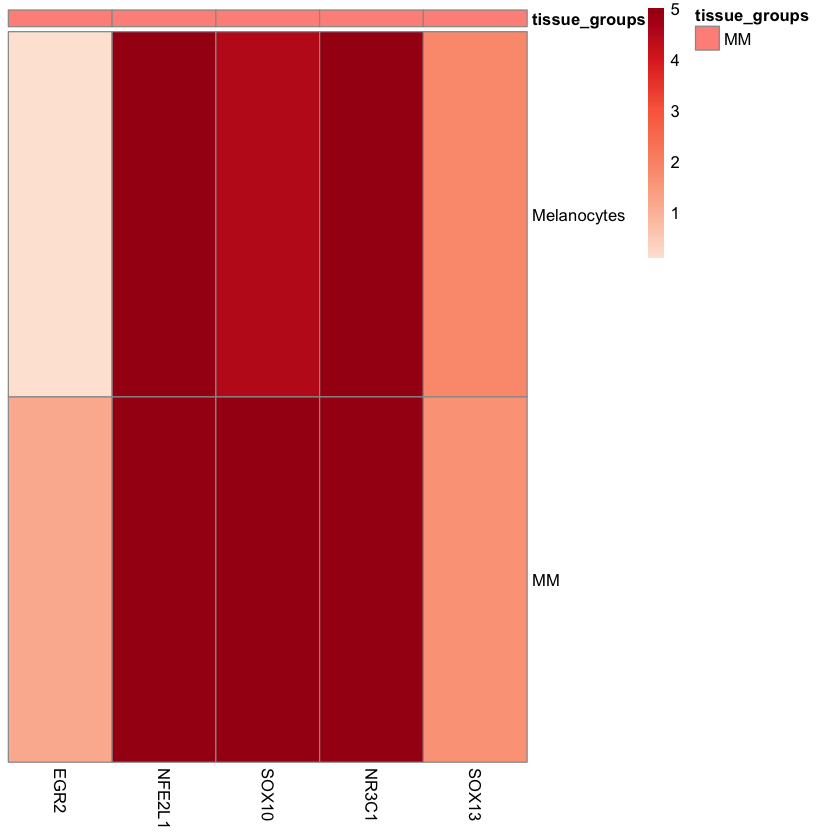

In [18]:
p_genexp =pheatmap(t(rna_df_tissue_log[tf_order_mm_mc,tissue_order_mm_mc]),
                    color = colorRampPalette(brewer.pal(n =6, name ="Reds"))(100),
                    annotation_col = tf_tissue_annon_mm_mc,
                    cluster_rows=F,cluster_cols=F)
save_pheatmap_pdf(p_genexp, paste0(save_prefix, 'camcer_vocab_rna_heatmap_mm_mc.pdf'),  height=1.4,width=4) 

In [19]:
kc_scc = c('GDSD6','SCC')
tf_kc_scc = filter(cancer_vocab_df_long, tissue %in% kc_scc)$tf_name
tf_order_kc_scc = tf_order[tf_order %in% tf_kc_scc]
tissue_order_kc_scc = tissue_order[tissue_order %in% kc_scc]
tf_tissue_annon_kc_scc = cancer_vocab_df_long%>%
    filter( tissue %in% kc_scc)%>%
    dplyr::select(tf_name,tissue)%>%
    arrange(tf_name)%>%
    distinct()%>%
    group_by(tf_name)%>%
    summarise(tissue_groups = paste0(tissue, collapse = "|")) %>%
    column_to_rownames('tf_name')


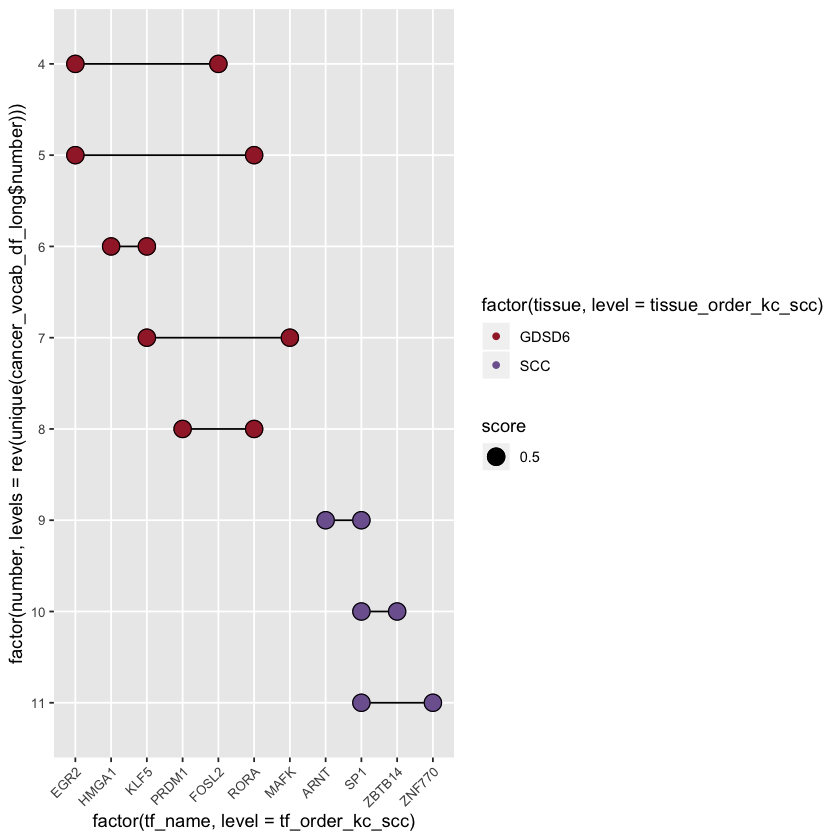

In [20]:
# cancer_vocab_df_long
p = ggplot(cancer_vocab_df_long %>% filter(tissue %in% kc_scc), 
           aes(x=factor(tf_name,level=tf_order_kc_scc),y= factor(number, levels=rev(unique(cancer_vocab_df_long$number))),
                                          color=factor(tissue, level=tissue_order_kc_scc)))+
    geom_line(aes(group = factor(number)),color='black')+geom_point(aes(size=score))+ 
    scale_color_manual(values=tissue_colors_filt$color)+
    geom_point(aes(size=score),colour="black",pch=21)+
    theme(axis.text.y = element_text(size=8),
          axis.text.x = element_text(size=8, angle = 45,hjust=1))
p 
ggsave(file = paste0(save_prefix, "cancer_vocab_tissue_pairs_kc_scc.eps"),height=3, width=7)
#

pdf 
  2

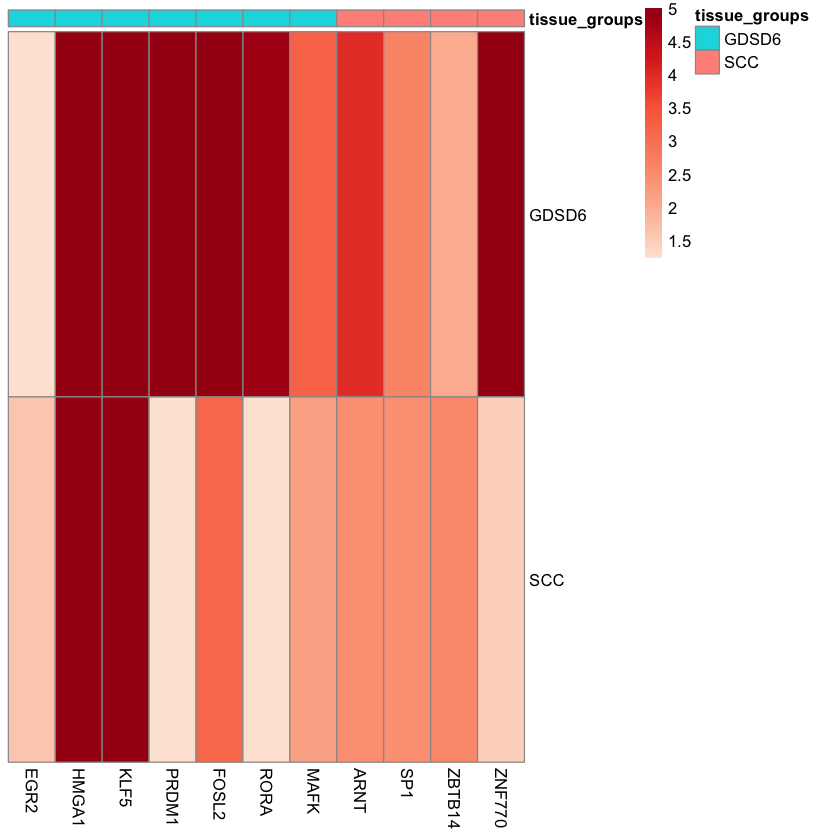

In [21]:
p_genexp =pheatmap(t(rna_df_tissue_log[tf_order_kc_scc,tissue_order_kc_scc]),
                    color = colorRampPalette(brewer.pal(n =6, name ="Reds"))(100),
                    annotation_col = tf_tissue_annon_kc_scc,
                    cluster_rows=F,cluster_cols=F)
save_pheatmap_pdf(p_genexp, paste0(save_prefix, 'camcer_vocab_rna_heatmap_kc_scc.pdf'),  height=1.4,width=6) 



# 3. go terms associated with target genes of cooperative TFS

make sure genesets exist, if not create in 9B_vocab_goterms

In [15]:
read_genes = function(filename,verbose=FALSE){
    if (verbose){
        print(filename)
    }
    
    if (file.exists(filename)){
        target_genes = read.csv(filename,header=FALSE,stringsAsFactors=F)$V1
        if (verbose){
            print(length(target_genes))
        }
        
        target_genes_entrez = bitr(target_genes, fromType="SYMBOL", toType="ENTREZID", OrgDb="org.Hs.eg.db")$ENTREZID
        if (verbose){
            print(length(target_genes_entrez))
        }
        return(target_genes_entrez)        
    }
    else{
        print(paste('Warning: file does not exist',filename))
        return(c())        
    }
}

In [16]:
# vocab_list = c('ARNT::SP1', 'BACH1::KLF5', 'E2F6::SP1', 'E2F7::THAP1',
#        'EBF1::SP4', 'EGR1::SP3', 'EGR2::FOSL2', 'EGR2::NFE2L1',
#        'EGR2::RARG', 'EGR2::RORA', 'EN2::STAT1', 'ETV2::PRRX1',
#        'FOXD3::PRRX1', 'FOXM1::KLF15', 'HBP1::IRF8', 'HBP1::STAT1',
#        'HMGA1::KLF5', 'IKZF1::ZNF563', 'IRF4::SP4', 'IRF8::SPIB',
#        'IRF8::ZBTB49', 'KLF15::OTX1', 'KLF15::SNAI2', 'KLF15::ZNF589',
#        'KLF16::TFAP2C', 'KLF4::KLF5', 'KLF5::MAFG', 'KLF5::MAFK',
#        'KLF5::NFYB', 'KLF5::NR2F1', 'KLF5::RUNX3', 'KLF5::SOX13',
#        'MAF::RORA', 'MAZ::SP1', 'MITF::ZNF589', 'NFATC4::STAT1',
#        'NFE2L1::NR3C1', 'NFE2L1::TBX15', 'NFE2L1::ZBTB49', 'OSR2::THAP1',
#        'PRDM1::RORA', 'SOX10::SOX13', 'SOX10::SP4', 'SP1::TFDP1',
#        'SP1::ZBTB14', 'SP1::ZBTB17', 'SP4::THAP1')# see 17_vocab_classes


In [17]:
cancer_vocab_df_coop = cancer_vocab_df_coop%>%
    mutate(vocab_file=str_c(tissue, '_',tf1, '-',tf2))

In [18]:
vocab_list = cancer_vocab_df_coop$vocab_file
print(vocab_list) # 35 vocab words

 [1] "MM_EGR2-NFE2L1"   "MM_NFE2L1-NR3C1"  "MM_SOX10-SOX13"   "GDSD6_EGR2-FOSL2"
 [5] "GDSD6_EGR2-RORA"  "GDSD6_HMGA1-KLF5" "GDSD6_KLF5-MAFK"  "GDSD6_PRDM1-RORA"
 [9] "SCC_ARNT-SP1"     "SCC_SP1-ZBTB14"   "SCC_SP1-ZNF770"  


In [19]:
tissue_to_lookup = list(c('SCC','GDSD6'),c('SCC','GDSD6'),
                        c('MM','Melanocytes'),c('MM','Melanocytes'))
names(tissue_to_lookup) = c('SCC','GDSD6','MM','Melanocytes')
tissue_to_lookup

$SCC
[1] "SCC"   "GDSD6"

$GDSD6
[1] "SCC"   "GDSD6"

$MM
[1] "MM"          "Melanocytes"

$Melanocytes
[1] "MM"          "Melanocytes"

In [20]:
length(all_genes)
all_genes_entrez = unique(bitr(all_genes, fromType="SYMBOL", toType="ENTREZID", OrgDb="org.Hs.eg.db")$ENTREZI)
length(all_genes_entrez)


[1] 24811

'select()' returned 1:many mapping between keys and columns



[1] 24815

In [30]:
# # create a list of all possible entrez ids that you care about
# all_genes = c()
# for (vocab in vocab_list){
# #     print(vocab)
#     tissue = strsplit(vocab, '_')[[1]][1]
#     chk_tissues = tissue_to_lookup[[tissue]] 
#     for (mpra_tissue in chk_tissues){
# #         print(mpra_tissue)
#         filename = paste0('../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/', vocab, '_',mpra_tissue,'.txt')
#         genes = read_genes(filename)
#         print(length(genes))
#         all_genes = c(all_genes, genes)
#         print(length(all_genes))
#     }

# }
# all_genes = unique(all_genes)
# length(all_genes)

In [81]:
# takes ~10-20 min
go_table_all_vocab = data.frame()
for (vocab in vocab_list){
#     print(vocab)
    tissue = strsplit(vocab, '_')[[1]][1]
    chk_tissues = tissue_to_lookup[[tissue]] 
    for (mpra_tissue in chk_tissues){
#         print(mpra_tissue)
        filename = paste0('../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/', vocab, '_',mpra_tissue,'.txt')
    
        genes = read_genes(filename,verbose=TRUE)
        ego <- enrichGO(gene          = genes,
                    universe      = all_genes_entrez,
                    OrgDb         = org.Hs.eg.db,
                    ont           = "BP",
                    pAdjustMethod = "BH",
                    pvalueCutoff  = 1,###SET
                    qvalueCutoff  = 1,###SET
            readable      = TRUE)

        ego = data.frame(ego)
        print(dim(ego))
        if (dim(ego)[1]>0){
            ego$vocab = vocab
            ego$tissue = tissue
            ego$mpra_tissue = mpra_tissue
            go_table_all_vocab = rbind(go_table_all_vocab, ego)
        }
    }
}


[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/Melanocytes_ETV2-PRRX1_MM.txt"
[1] 553


'select()' returned 1:1 mapping between keys and columns



[1] 553
[1] 4141    9
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/Melanocytes_ETV2-PRRX1_Melanocytes.txt"
[1] 45


'select()' returned 1:1 mapping between keys and columns



[1] 45
[1] 806   9
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/Melanocytes_FOXD3-PRRX1_MM.txt"
[1] 366


'select()' returned 1:1 mapping between keys and columns



[1] 366
[1] 3508    9
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/Melanocytes_FOXD3-PRRX1_Melanocytes.txt"
[1] 21


'select()' returned 1:1 mapping between keys and columns



[1] 21
[1] 702   9
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/Melanocytes_KLF15-ZNF589_MM.txt"
[1] "Warning: file does not exist ../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/Melanocytes_KLF15-ZNF589_MM.txt"


--> No gene can be mapped....

--> Expected input gene ID: 11063,480,474343,5367,5073,51804

--> return NULL...



[1] 0 0
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/Melanocytes_KLF15-ZNF589_Melanocytes.txt"
[1] 101


'select()' returned 1:1 mapping between keys and columns



[1] 101
[1] 1966    9
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/Melanocytes_KLF5-NFYB_MM.txt"
[1] 173


'select()' returned 1:1 mapping between keys and columns



[1] 173
[1] 2358    9
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/Melanocytes_KLF5-NFYB_Melanocytes.txt"
[1] 29


'select()' returned 1:1 mapping between keys and columns



[1] 29
[1] 680   9
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/Melanocytes_MITF-ZNF589_MM.txt"
[1] "Warning: file does not exist ../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/Melanocytes_MITF-ZNF589_MM.txt"


--> No gene can be mapped....

--> Expected input gene ID: 7216,23195,4036,3236,200558,642636

--> return NULL...



[1] 0 0
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/Melanocytes_MITF-ZNF589_Melanocytes.txt"
[1] 14


'select()' returned 1:1 mapping between keys and columns



[1] 14
[1] 392   9
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/MM_ARID5B-LEF1_MM.txt"
[1] 464


'select()' returned 1:1 mapping between keys and columns



[1] 464
[1] 3784    9
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/MM_ARID5B-LEF1_Melanocytes.txt"
[1] 13


'select()' returned 1:1 mapping between keys and columns



[1] 13
[1] 376   9
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/MM_EGR2-NFE2L1_MM.txt"
[1] 610


'select()' returned 1:1 mapping between keys and columns



[1] 610
[1] 4383    9
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/MM_EGR2-NFE2L1_Melanocytes.txt"
[1] "Warning: file does not exist ../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/MM_EGR2-NFE2L1_Melanocytes.txt"


--> No gene can be mapped....

--> Expected input gene ID: 246777,92,3400,1050,79846,4257

--> return NULL...



[1] 0 0
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/MM_EN2-STAT1_MM.txt"
[1] 459


'select()' returned 1:1 mapping between keys and columns



[1] 459
[1] 3865    9
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/MM_EN2-STAT1_Melanocytes.txt"
[1] 3


'select()' returned 1:1 mapping between keys and columns



[1] 3
[1] 61  9
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/MM_HBP1-STAT1_MM.txt"
[1] 467


'select()' returned 1:1 mapping between keys and columns



[1] 467
[1] 3761    9
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/MM_HBP1-STAT1_Melanocytes.txt"
[1] 12


'select()' returned 1:1 mapping between keys and columns



[1] 12
[1] 206   9
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/MM_NFATC4-STAT1_MM.txt"
[1] 615


'select()' returned 1:1 mapping between keys and columns



[1] 615
[1] 4263    9
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/MM_NFATC4-STAT1_Melanocytes.txt"
[1] 26


'select()' returned 1:1 mapping between keys and columns



[1] 26
[1] 440   9
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/MM_NFE2L1-NR3C1_MM.txt"
[1] 522


'select()' returned 1:1 mapping between keys and columns



[1] 522
[1] 4163    9
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/MM_NFE2L1-NR3C1_Melanocytes.txt"
[1] 7


'select()' returned 1:1 mapping between keys and columns



[1] 7
[1] 162   9
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/MM_NFE2L1-TBX15_MM.txt"
[1] 580


'select()' returned 1:1 mapping between keys and columns



[1] 580
[1] 4368    9
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/MM_NFE2L1-TBX15_Melanocytes.txt"
[1] "Warning: file does not exist ../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/MM_NFE2L1-TBX15_Melanocytes.txt"


--> No gene can be mapped....

--> Expected input gene ID: 120892,29781,84056,8879,2177,389730

--> return NULL...



[1] 0 0
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/MM_NFE2L1-ZBTB49_MM.txt"
[1] 599


'select()' returned 1:1 mapping between keys and columns



[1] 599
[1] 4300    9
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/MM_NFE2L1-ZBTB49_Melanocytes.txt"
[1] 15


'select()' returned 1:1 mapping between keys and columns



[1] 15
[1] 338   9
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/MM_SOX10-SOX13_MM.txt"
[1] 627


'select()' returned 1:1 mapping between keys and columns



[1] 627
[1] 4356    9
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/MM_SOX10-SOX13_Melanocytes.txt"
[1] 18


'select()' returned 1:1 mapping between keys and columns



[1] 18
[1] 246   9
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/MM_SOX10-SP4_MM.txt"
[1] 542


'select()' returned 1:1 mapping between keys and columns



[1] 542
[1] 4124    9
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/MM_SOX10-SP4_Melanocytes.txt"
[1] "Warning: file does not exist ../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/MM_SOX10-SP4_Melanocytes.txt"


--> No gene can be mapped....

--> Expected input gene ID: 79084,10189,339906,83893,51738,3726

--> return NULL...



[1] 0 0
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/GDSD6_BACH1-KLF5_SCC.txt"
[1] 988


'select()' returned 1:1 mapping between keys and columns



[1] 988
[1] 5132    9
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/GDSD6_BACH1-KLF5_GDSD6.txt"
[1] 100


'select()' returned 1:1 mapping between keys and columns



[1] 100
[1] 1886    9
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/GDSD6_EGR2-FOSL2_SCC.txt"
[1] 1164


'select()' returned 1:1 mapping between keys and columns



[1] 1164
[1] 5311    9
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/GDSD6_EGR2-FOSL2_GDSD6.txt"
[1] 255


'select()' returned 1:1 mapping between keys and columns



[1] 255
[1] 3193    9
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/GDSD6_EGR2-RARG_SCC.txt"
[1] 1103


'select()' returned 1:1 mapping between keys and columns



[1] 1103
[1] 5280    9
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/GDSD6_EGR2-RARG_GDSD6.txt"
[1] 196


'select()' returned 1:1 mapping between keys and columns



[1] 196
[1] 2573    9
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/GDSD6_EGR2-RORA_SCC.txt"
[1] "Warning: file does not exist ../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/GDSD6_EGR2-RORA_SCC.txt"


--> No gene can be mapped....

--> Expected input gene ID: 7472,2797,22836,675,5737,10735

--> return NULL...



[1] 0 0
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/GDSD6_EGR2-RORA_GDSD6.txt"
[1] 205


'select()' returned 1:1 mapping between keys and columns



[1] 205
[1] 3002    9
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/GDSD6_HMGA1-KLF5_SCC.txt"
[1] 1444


'select()' returned 1:1 mapping between keys and columns



[1] 1444
[1] 5624    9
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/GDSD6_HMGA1-KLF5_GDSD6.txt"
[1] 284


'select()' returned 1:1 mapping between keys and columns



[1] 284
[1] 3326    9
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/GDSD6_JUNB-RORA_SCC.txt"
[1] 491


'select()' returned 1:1 mapping between keys and columns



[1] 491
[1] 4052    9
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/GDSD6_JUNB-RORA_GDSD6.txt"
[1] 120


'select()' returned 1:1 mapping between keys and columns



[1] 120
[1] 2175    9
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/GDSD6_KLF5-MAFG_SCC.txt"
[1] 1131


'select()' returned 1:1 mapping between keys and columns



[1] 1131
[1] 5277    9
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/GDSD6_KLF5-MAFG_GDSD6.txt"
[1] 159


'select()' returned 1:1 mapping between keys and columns



[1] 159
[1] 2363    9
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/GDSD6_KLF5-MAFK_SCC.txt"
[1] 1094


'select()' returned 1:1 mapping between keys and columns



[1] 1094
[1] 5208    9
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/GDSD6_KLF5-MAFK_GDSD6.txt"
[1] 144


'select()' returned 1:1 mapping between keys and columns



[1] 144
[1] 2221    9
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/GDSD6_MAF-RORA_SCC.txt"
[1] "Warning: file does not exist ../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/GDSD6_MAF-RORA_SCC.txt"


--> No gene can be mapped....

--> Expected input gene ID: 286151,7158,10097,5914,8890,6790

--> return NULL...



[1] 0 0
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/GDSD6_MAF-RORA_GDSD6.txt"
[1] 109


'select()' returned 1:1 mapping between keys and columns



[1] 109
[1] 2355    9
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/GDSD6_PRDM1-RORA_SCC.txt"
[1] 405


'select()' returned 1:1 mapping between keys and columns



[1] 405
[1] 3774    9
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/GDSD6_PRDM1-RORA_GDSD6.txt"
[1] 91


'select()' returned 1:1 mapping between keys and columns



[1] 91
[1] 2006    9
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/SCC_ARNT-SP1_SCC.txt"
[1] 828


'select()' returned 1:1 mapping between keys and columns



[1] 828
[1] 4796    9
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/SCC_ARNT-SP1_GDSD6.txt"
[1] 91


'select()' returned 1:1 mapping between keys and columns



[1] 91
[1] 1537    9
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/SCC_E2F6-SP1_SCC.txt"
[1] 1385


'select()' returned 1:1 mapping between keys and columns



[1] 1385
[1] 5505    9
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/SCC_E2F6-SP1_GDSD6.txt"
[1] 274


'select()' returned 1:1 mapping between keys and columns



[1] 274
[1] 3157    9
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/SCC_EGR1-SP3_SCC.txt"
[1] 1432


'select()' returned 1:1 mapping between keys and columns



[1] 1432
[1] 5556    9
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/SCC_EGR1-SP3_GDSD6.txt"
[1] 327


'select()' returned 1:1 mapping between keys and columns



[1] 327
[1] 3508    9
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/SCC_KLF16-TFAP2C_SCC.txt"
[1] 1220


'select()' returned 1:1 mapping between keys and columns



[1] 1220
[1] 5400    9
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/SCC_KLF16-TFAP2C_GDSD6.txt"
[1] 191


'select()' returned 1:1 mapping between keys and columns



[1] 191
[1] 2722    9
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/SCC_KLF4-KLF5_SCC.txt"
[1] 1509


'select()' returned 1:1 mapping between keys and columns



[1] 1509
[1] 5636    9
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/SCC_KLF4-KLF5_GDSD6.txt"
[1] 432


'select()' returned 1:1 mapping between keys and columns



[1] 432
[1] 3869    9
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/SCC_MAZ-SP1_SCC.txt"
[1] 1583


'select()' returned 1:1 mapping between keys and columns



[1] 1583
[1] 5692    9
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/SCC_MAZ-SP1_GDSD6.txt"
[1] 473


'select()' returned 1:1 mapping between keys and columns



[1] 473
[1] 4085    9
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/SCC_SP1-TFDP1_SCC.txt"
[1] 1189


'select()' returned 1:1 mapping between keys and columns



[1] 1189
[1] 5378    9
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/SCC_SP1-TFDP1_GDSD6.txt"
[1] 179


'select()' returned 1:1 mapping between keys and columns



[1] 179
[1] 2343    9
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/SCC_SP1-ZBTB14_SCC.txt"
[1] 1018


'select()' returned 1:1 mapping between keys and columns



[1] 1018
[1] 5114    9
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/SCC_SP1-ZBTB14_GDSD6.txt"
[1] 109


'select()' returned 1:1 mapping between keys and columns



[1] 109
[1] 1777    9
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/SCC_SP1-ZBTB17_SCC.txt"
[1] 1539


'select()' returned 1:1 mapping between keys and columns



[1] 1539
[1] 5659    9
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/SCC_SP1-ZBTB17_GDSD6.txt"
[1] 423


'select()' returned 1:1 mapping between keys and columns



[1] 423
[1] 3938    9
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/SCC_SP1-ZNF770_SCC.txt"
[1] 1523


'select()' returned 1:1 mapping between keys and columns



[1] 1523
[1] 5617    9
[1] "../data/processed/fig7_vocab_go/vocab_geneset_all_tissue/SCC_SP1-ZNF770_GDSD6.txt"
[1] 384


'select()' returned 1:1 mapping between keys and columns



[1] 384
[1] 3700    9


In [83]:
go_table_all_vocab%>%filter(pvalue<0.05)%>%dim()

[1] 20823    12

In [82]:
# save go_table_all_vocab
write.csv(go_table_all_vocab, paste0(save_prefix,'go_table_all_vocab.csv'))

In [21]:
go_table_all_vocab = read.csv(paste0(save_prefix,'go_table_all_vocab.csv'),row.names=1, stringsAsFactor=F)
go_table_all_vocab = filter(go_table_all_vocab, vocab %in% vocab_list)

In [22]:
length(unique(go_table_all_vocab$vocab))

[1] 11

In [23]:
head(go_table_all_vocab)
dim(go_table_all_vocab)

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count,vocab,tissue,mpra_tissue
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>
1,GO:0051348,negative regulation of transferase activity,23/568,272/17715,2.397579e-05,0.09651942,0.0942744,AKT1S1/CBL/CDKN1B/CORO1C/DUSP7/EIF4A2/ERRFI1/HEXIM1/HEXIM2/HSPB1/ITPRIP/MAD2L2/MIDN/NPRL2/PKIG/PTPN1/RGS4/SH3BP5/SMPD1/SPRED2/TRIB1/TRIB2/VPS25,23,MM_EGR2-NFE2L1,MM,MM
2,GO:0033673,negative regulation of kinase activity,21/568,245/17715,4.404263e-05,0.09651942,0.0942744,AKT1S1/CBL/CDKN1B/CORO1C/DUSP7/ERRFI1/HEXIM1/HEXIM2/HSPB1/ITPRIP/MIDN/NPRL2/PKIG/PTPN1/RGS4/SH3BP5/SMPD1/SPRED2/TRIB1/TRIB2/VPS25,21,MM_EGR2-NFE2L1,MM,MM
3,GO:0006469,negative regulation of protein kinase activity,19/568,223/17715,1.088406e-04,0.15901613,0.1553175,AKT1S1/CBL/CDKN1B/CORO1C/DUSP7/ERRFI1/HEXIM1/HEXIM2/HSPB1/ITPRIP/PKIG/PTPN1/RGS4/SH3BP5/SMPD1/SPRED2/TRIB1/TRIB2/VPS25,19,MM_EGR2-NFE2L1,MM,MM
4,GO:0042254,ribosome biogenesis,22/568,288/17715,1.605003e-04,0.16850463,0.1645853,DDX47/DKC1/EXOSC2/FAM207A/IMP3/MRPL10/MRPS7/PIH1D1/POP4/PPAN/REXO4/RPL10/RPL24/RPL26L1/RPL3/RPL35/RPL7A/RPS9/RRP1/UTP23/WDR74/ZNF622,22,MM_EGR2-NFE2L1,MM,MM
5,GO:0022613,ribonucleoprotein complex biogenesis,31/568,481/17715,1.927232e-04,0.16850463,0.1645853,CIRBP/CLP1/DDX47/DKC1/EIF2S2/EIF3H/EXOSC2/FAM207A/IMP3/LUC7L3/MRPL10/MRPS7/NOL3/PIH1D1/POP4/PPAN/PRMT5/REXO4/RPL10/RPL24/RPL26L1/RPL3/RPL35/RPL7A/RPS9/RRP1/SNRPD2/SRSF1/UTP23/WDR74/ZNF622,31,MM_EGR2-NFE2L1,MM,MM
6,GO:0006414,translational elongation,13/568,130/17715,2.801909e-04,0.16850463,0.1645853,EEF2K/GADD45GIP1/MRPL10/MRPL14/MRPL44/MRPL50/MRPL52/MRPS21/MRPS27/MRPS28/MRPS7/RPLP2/SRP9,13,MM_EGR2-NFE2L1,MM,MM


[1] 69516    12

#### manual step to curate which ones you like


final tabe willb e selected rows

with 
- vocab --> tf1 tf2
- go term
- pval- size
- logfc - color


bring manual table into r --> `go_term_df`

For the MC/MM/KC/SCC GOTerm plot, we're almost there -- can you get rid of 
- 'macromolecule catabolic process' ,GO:0009057
- 'lymphocyte proliferation' , GO:0046651
- 'regulation of epithelial cell differentiation' GO:0030856
- 'establishment of vesicle localization' GO:0051650

In [24]:
# go_table_all_vocab %>%
#     filter(Description=='establishment of vesicle localization')%>%
#     dplyr::select(ID)%>%distinct()

In [25]:
# go_table_all_vocab = read.csv(paste0(save_prefix, 'go_table_all_vocab.csv'),row.names=1,stringsAsFactor=F)
# head(go_table_all_vocab)
go_ids_normal = c('GO:0008544','GO:0009913','GO:0030216','GO:0043588','GO:0031424',
'GO:0070268','GO:0030855','GO:0030154','GO:0060429','GO:0042110','GO:0071560','GO:0022407','GO:0071559',
'GO:0016050','GO:0046649','GO:0007179','GO:0007249','GO:0034612','GO:0002684','GO:0032388','GO:0030029',
'GO:0071356','GO:0007266','GO:0033209','GO:0051648','GO:0006955','GO:0050673','GO:0016192','GO:0030036',
'GO:0048754','GO:0050851','GO:0045087','GO:0002285','GO:0034644','GO:0050776','GO:0002429','GO:0009411',
'GO:0016485','GO:0007015','GO:0051049','GO:0002449','GO:0009059','GO:0042113','GO:0044265','GO:0046907','GO:0051336',
'GO:0034645','GO:0051345','GO:0030041','GO:0030833','GO:0072676','GO:0030177','GO:0030301',
                 'GO:0045787','GO:0030334', 'GO:1901987')

In [26]:
# length(unique(go_ids_normal))

# go_table_all_vocab%>%filter(ID %in% c(go_ids_normal,'GO:1901987'))%>%
#     dplyr::select(ID)%>%
#     distinct()%>%dim()

# go_table_all_vocab[go_ids_normal,]%>%
# 'GO:1901987' %in% go_terms_to_keep
# 'GO:1901987' %in% go_table_all_vocab_filt$ID

In [27]:

go_ids_cancer = c( 'GO:0034248','GO:1903825','GO:1905039','GO:19033112','GO:1903311',                    
                     'GO:00704821','GO:0070482','GO:00362936','GO:0036293','GO:00068117','GO:0006811',
                     'GO:00061647','GO:0006164','GO:00424404','GO:0042440','GO:00198279','GO:0019827'	,
                     'GO:00072659','GO:0007265'	,'GO:001922110','GO:0019221','GO:00072649','GO:0007264'	,
                     'GO:003409712','GO:0034097','GO:000695415','GO:0006954','GO:005124615','GO:0051246',
                     'GO:004360411','GO:0043604','GO:000695211','GO:0006952','GO:004211913','GO:0042119',
                     'GO:00314245','GO:0031424'	,'GO:00085449','GO:0008544'	,'GO:00099139','GO:0009913'	,
                     'GO:00302169','GO:0030216'	,
                      'GO:0002694','GO:0019827','GO:0140014','GO:0000070','GO:0007088','GO:0000086','GO:0043473',
                  'GO:0000280','GO:0051783','GO:0051781','GO:0043535','GO:0000086','GO:0032204'
                 )
go_terms_to_keep = unique(c(go_ids_normal,go_ids_cancer))
length(go_terms_to_keep)
go_table_all_vocab_filt = go_table_all_vocab%>%filter(ID %in% go_terms_to_keep)
length(unique(go_table_all_vocab_filt$ID))

dim(go_table_all_vocab_filt)
head(go_table_all_vocab_filt)

[1] 106

[1] 59

[1] 1014   12

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count,vocab,tissue,mpra_tissue
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>
1,GO:1903311,regulation of mRNA metabolic process,18/568,321/17715,0.01586663,0.5682192,0.5550025,CIRBP/EXOSC2/HNRNPR/HSPB1/IGF2BP2/MBNL2/NUP98/PSMC3/PTCD2/SF3B4/SRSF1/SRSF2/TRA2B/U2AF2/UBC/VIM/ZC3H14/ZFP36L1,18,MM_EGR2-NFE2L1,MM,MM
2,GO:0034248,regulation of cellular amide metabolic process,23/568,457/17715,0.02266395,0.6457951,0.6307741,ABCA7/CIRBP/EIF1/EIF3H/EIF4A2/GGA3/HNRNPR/HSPB1/IGF2BP2/MIF4GD/MRPS27/PDP1/PPP1CA/RPL10/RPS3/RPS9/SESN2/SOX4/SRP9/TMED10/VIM/ZFP36L1/ZNF706,23,MM_EGR2-NFE2L1,MM,MM
3,GO:0070482,response to oxygen levels,20/568,386/17715,0.02457175,0.6457951,0.6307741,ADA/ADM/ATP6V1A/CBL/CDKN1B/CRYAB/CYGB/DNMT3A/EEF2K/LOXL2/MB/NDRG1/NOL3/NR4A2/PLOD2/PPARGC1A/PSMC3/TXN2/UBC/ZFP36L1,20,MM_EGR2-NFE2L1,MM,MM
4,GO:0036293,response to decreased oxygen levels,19/568,362/17715,0.02490674,0.6457951,0.6307741,ADA/ADM/CBL/CDKN1B/CRYAB/CYGB/DNMT3A/EEF2K/LOXL2/MB/NDRG1/NOL3/NR4A2/PLOD2/PPARGC1A/PSMC3/TXN2/UBC/ZFP36L1,19,MM_EGR2-NFE2L1,MM,MM
5,GO:1903825,organic acid transmembrane transport,9/568,132/17715,0.02637402,0.6457951,0.6307741,RGS4/SLC16A3/SLC1A4/SLC23A2/SLC25A15/SLC38A1/SLC7A5/SLC7A7/STRA6,9,MM_EGR2-NFE2L1,MM,MM
6,GO:1905039,carboxylic acid transmembrane transport,9/568,132/17715,0.02637402,0.6457951,0.6307741,RGS4/SLC16A3/SLC1A4/SLC23A2/SLC25A15/SLC38A1/SLC7A5/SLC7A7/STRA6,9,MM_EGR2-NFE2L1,MM,MM


In [28]:
# go_table_all_vocab%>%
#     filter(pvalue<0.05)%>%
#     filter(Description =='regulation of telomere maintenance')%>%
#     mutate(neglog10pval = -log10(pvalue))%>%
#     mutate(log2count = log2(Count)) %>%
#     filter(log2count>.9)


In [29]:
# data.frame(ID = go_terms_to_keep)%>%
#     inner_join(go_table_all_vocab%>%dplyr::select(ID,Description), by='ID')%>%
#     distinct()%>%
#     mutate(is_normal = ID %in% go_ids_normal)%>%
#     mutate(is_cancer = ID %in% go_ids_cancer)

In [30]:
go_descriptions = unique(go_table_all_vocab_filt$Description)
length(go_descriptions)

[1] 59

In [31]:
unique(go_table_all_vocab_filt$mpra_tissue)
cancer_tissues = c('MM','SCC')
nl_tissues = c('Melanocytes','GDSD6')

[1] "MM"          "Melanocytes" "SCC"         "GDSD6"

In [33]:
unique(go_table_all_vocab_filt$tissue)
unique(go_table_all_vocab_filt$mpra_tissue)


[1] "MM"    "GDSD6" "SCC"

[1] "MM"          "Melanocytes" "SCC"         "GDSD6"

In [37]:
type_pre = "match"
if (type_pre=='cancer'){
    go_term_df = filter(go_table_all_vocab_filt,mpra_tissue %in% cancer_tissues)
} else if (type_pre=='nl'){
    go_term_df = filter(go_table_all_vocab_filt,mpra_tissue %in% nl_tissues)
} else if (type_pre=='match'){
    go_term_df = filter(go_table_all_vocab_filt,mpra_tissue == tissue)
    
}
go_term_df = go_term_df%>%
    filter(pvalue<0.05)%>%
    mutate(neglog10pval = -log10(pvalue))%>%
    mutate(log2count = log2(Count)) %>%
    filter(log2count>.7)%>%
    separate('vocab',c('tissue','vocab_pair'),remove=FALSE,sep='[_]')%>%
    separate('vocab_pair',c('vocab1','vocab2'),remove=FALSE,sep='[-]')%>%
    mutate(vocab = str_c(vocab1, "::",vocab2))%>%
    full_join(cancer_vocab_df_coop[,c('vocab','index')], on='index')
colnames(go_term_df)
go_term_df_long1 = go_term_df[,c("vocab1",'Description','pvalue','Count')]
colnames(go_term_df_long1) = c("tf_name",'Description','pvalue','Count')
go_term_df_long2 = go_term_df[,c("vocab2",'Description','pvalue','Count')]
colnames(go_term_df_long2) = c("tf_name",'Description','pvalue','Count')
go_term_df_long = rbind(go_term_df_long1, go_term_df_long2)
str(go_term_df_long)

Joining, by = "vocab"



[1] "ID"           "Description"  "GeneRatio"    "BgRatio"      "pvalue"      
 [6] "p.adjust"     "qvalue"       "geneID"       "Count"        "vocab"       
[11] "tissue"       "vocab_pair"   "vocab1"       "vocab2"       "mpra_tissue" 
[16] "neglog10pval" "log2count"    "index"

'data.frame':	286 obs. of  4 variables:
 $ tf_name    : chr  "EGR2" "EGR2" "EGR2" "EGR2" ...
 $ Description: chr  "regulation of mRNA metabolic process" "regulation of cellular amide metabolic process" "response to oxygen levels" "response to decreased oxygen levels" ...
 $ pvalue     : num  0.0159 0.0227 0.0246 0.0249 0.0264 ...
 $ Count      : int  18 23 20 19 9 9 14 14 22 12 ...


In [38]:
used_GO_terms = unique(go_term_df_long$Description)
length(used_GO_terms)
# ones that go dropped out
go_descriptions[!(go_descriptions %in% used_GO_terms)]

[1] 42

[1] "transforming growth factor beta receptor signaling pathway"        
 [2] "cellular response to transforming growth factor beta stimulus"     
 [3] "cellular response to UV"                                           
 [4] "B cell activation"                                                 
 [5] "positive regulation of cell cycle"                                 
 [6] "cholesterol transport"                                             
 [7] "immune response-activating cell surface receptor signaling pathway"
 [8] "antigen receptor-mediated signaling pathway"                       
 [9] "vesicle localization"                                              
[10] "positive regulation of Wnt signaling pathway"                      
[11] "lymphocyte activation involved in immune response"                 
[12] "protein processing"                                                
[13] "lymphocyte mediated immunity"                                      
[14] "T cell activation"                                                 
[15] "regulation of leukocyte activation"                                
[16] "positive regulation of cell division"                              
[17] "lymphocyte migration"

In [39]:
dropped_indices = cancer_vocab_df_coop$index[!(cancer_vocab_df_coop$index %in%unique(go_term_df$index))]
dropped_indices


integer(0)

In [40]:
# go_table_all_vocab_filt%>%
#     filter(vocab=='Melanocytes_MITF-ZNF589')%>%
#     filter(pvalue<0.05)%>%
# #     filter(mpra_tissue %in% cancer_tissues)%>%
# #     mutate(neglog10pval = -log10(pvalue))%>%
# #     mutate(log2count = log2(Count))# %>%
# # #     filter(log2count>.7)


In [41]:
# if missing print here

# vocab_list[dropped_indices]

In [42]:
# # go_table_all_vocab_filt%>%filter (vocab_pair=='MITF-ZNF589')
# go_table_all_vocab%>%
#     filter (vocab=='Melanocytes_MITF-ZNF589')%>%
# #     filter(ID=='GO:1901987')%>%#   , 0000082
#     filter(pvalue<0.05)%>%
#     mutate(log2count = log2(Count)) %>%
#     filter(log2count>.7)

In [43]:
# do the below thing once

go_term_order = unique(go_term_df$Description)


length(go_term_order)

[1] 42

In [44]:
# p = ggplot(go_term_df, aes(x= factor(Description,levels=go_term_order),y=factor(index, levels=rev(sort(unique(go_term_df$index)))),
#                                           color=log2count, size=neglog10pval))+
#     geom_point()+
# #     geom_point(aes(size=score),colour="black",pch=21)+# I think this for bordering probably remove
#     theme(axis.text.y = element_text(size=12),
#           axis.text.x = element_text(size=12, angle = 45,hjust=1))
# p
# ggsave(file = paste0(save_prefix, "go_term_df_long_draft_nl.eps"),height=8, width=14)


# manually adjust go_term_order -
also filter go terms here

split mm and scc

In [45]:
go_term_df_filt = go_term_df#%>%


In [46]:
# go_term_order
go_term_order_mm_mc = c('regulation of actin filament polymerization',
'actin filament polymerization'	,
# 'regulation of cell migration',
'cholesterol transport'	,
'vesicle organization'	,
'vesicle localization'	,
'positive regulation of intracellular transport'	,
'cellular response to UV'	,
'response to UV'	,
'pigmentation'	,
'pigment metabolic process'	,
'stem cell population maintenance'	,
'G2/M transition of mitotic cell cycle',
                   'regulation of cell cycle phase transition',
'organic acid transmembrane transport'	,
'regulation of cellular amide metabolic process',	
# 'amide biosynthetic process'	,
# 'ion transport'	,
'purine nucleotide biosynthetic process'	,
'regulation of mRNA metabolic process'	,
'response to oxygen levels'	,
'response to decreased oxygen levels')
go_term_order_kc_scc  = c('response to oxygen levels'	,
'response to decreased oxygen levels'	,
'epidermis development'	,
'epidermal cell differentiation'	,
'keratinocyte differentiation'	,
'keratinization'	,
'skin development'	,
'cornification'	,
# 'epithelial cell differentiation'	,
# 'epithelium development'	,
# 'defense response'	,
# 'cytokine-mediated signaling pathway'	,
# 'response to cytokine'	,
# 'immune response'	,
'neutrophil activation'	,
'Ras protein signal transduction'	,
'mitotic nuclear division'	,
'regulation of nuclear division'	,
'response to tumor necrosis factor'	,
'cellular response to tumor necrosis factor',	
'G2/M transition of mitotic cell cycle',
'regulation of telomere maintenance'
)
go_term_order = unique(c(go_term_order_mm_mc, go_term_order_kc_scc))
length(go_term_order)
length(go_term_order_mm_mc)
length(go_term_order_kc_scc)

[1] 32

[1] 19

[1] 16

In [47]:
go_term_df_filt = go_term_df%>%
    filter(Description %in% go_term_order)%>%
    dplyr::select(-index)%>%
    full_join(cancer_vocab_df_coop[,c('vocab','index')], on='index')%>%
    full_join(data.frame(Description=go_term_order), on='Description')
dim(go_term_df)
dim(go_term_df_filt)

Joining, by = "vocab"

Joining, by = "Description"

Warning message:
“Column `Description` joining character vector and factor, coercing into character vector”


[1] 143  18

[1] 105  18

In [48]:
go_term_df_filt_mm_mc = go_term_df%>% filter(tissue %in% mm_mc)%>%
    filter(Description %in% go_term_order_mm_mc)%>%
    dplyr::select(-index)%>%
    full_join(cancer_vocab_df_coop%>% filter(tissue %in% mm_mc)%>% 
              dplyr::select(vocab,index), on='index')%>%
    full_join(data.frame(Description=go_term_order_mm_mc), on='Description')
go_term_df_filt_kc_scc = go_term_df%>% filter(tissue %in% kc_scc)%>%
    filter(Description %in% go_term_order_kc_scc)%>%
    dplyr::select(-index)%>%
    full_join(cancer_vocab_df_coop%>% filter(tissue %in% kc_scc)%>% 
              dplyr::select(vocab,index), on='index')%>%
    full_join(data.frame(Description=go_term_order_kc_scc), on='Description')

Joining, by = "vocab"

Joining, by = "Description"

Warning message:
“Column `Description` joining character vector and factor, coercing into character vector”
Joining, by = "vocab"

Joining, by = "Description"

Warning message:
“Column `Description` joining character vector and factor, coercing into character vector”


In [49]:
length(unique(go_term_df_filt$vocab))# should be 35
length(unique(go_term_df_filt_mm_mc$vocab))# should be 15
length(unique(go_term_df_filt_kc_scc$vocab))# should be 20
length(unique(go_term_df_filt$Description))# should be 33
length(unique(go_term_df_filt_mm_mc$Description))# should be 19
length(unique(go_term_df_filt_kc_scc$Description))# should be 17


[1] 12

[1] 4

[1] 8

[1] 32

[1] 19

[1] 16

Warning message:
“Removed 3 rows containing missing values (geom_point).”
Warning message:
“Removed 3 rows containing missing values (geom_point).”


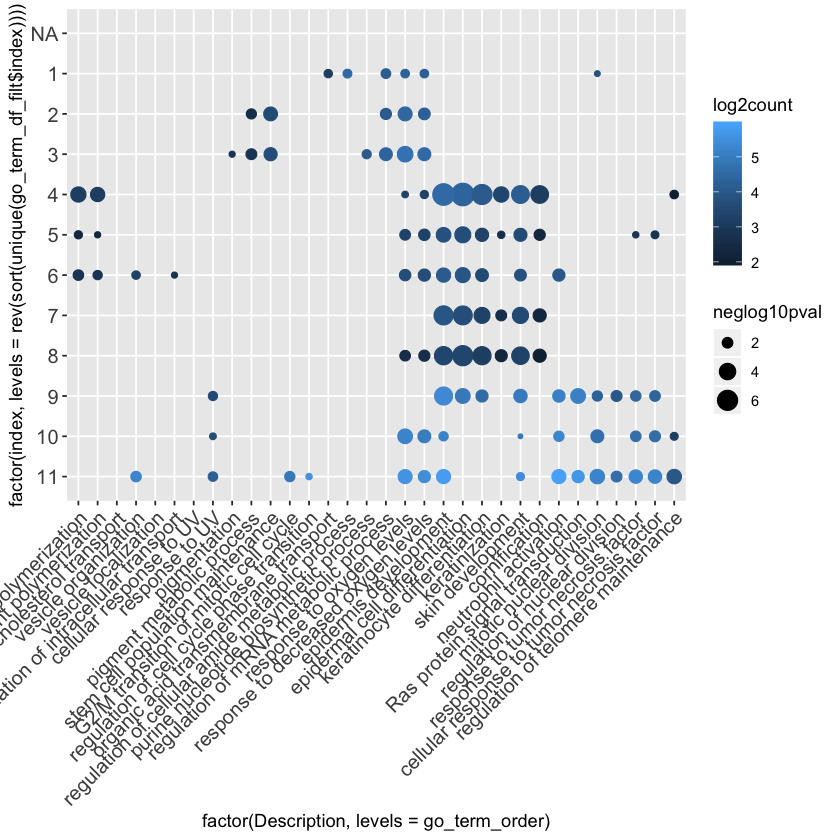

In [50]:
p = ggplot(go_term_df_filt, aes(x= factor(Description,levels=go_term_order),y=factor(index, levels=rev(sort(unique(go_term_df_filt$index)))),
                                          color=log2count, size=neglog10pval))+
    geom_point()+
#     geom_point(aes(size=score),colour="black",pch=21)+# I think this for bordering probably remove
    theme(axis.text.y = element_text(size=12),
          axis.text.x = element_text(size=12, angle = 45,hjust=1))
p 
ggsave(file = paste0(save_prefix, "go_term_df_long_", type_pre, ".eps"),height=7, width=11)
# ggsave(file = paste0(save_prefix, "go_term_df_long_nl.eps"),height=10, width=11)
#

Warning message:
“Removed 10 rows containing missing values (geom_point).”
Warning message:
“Removed 10 rows containing missing values (geom_point).”


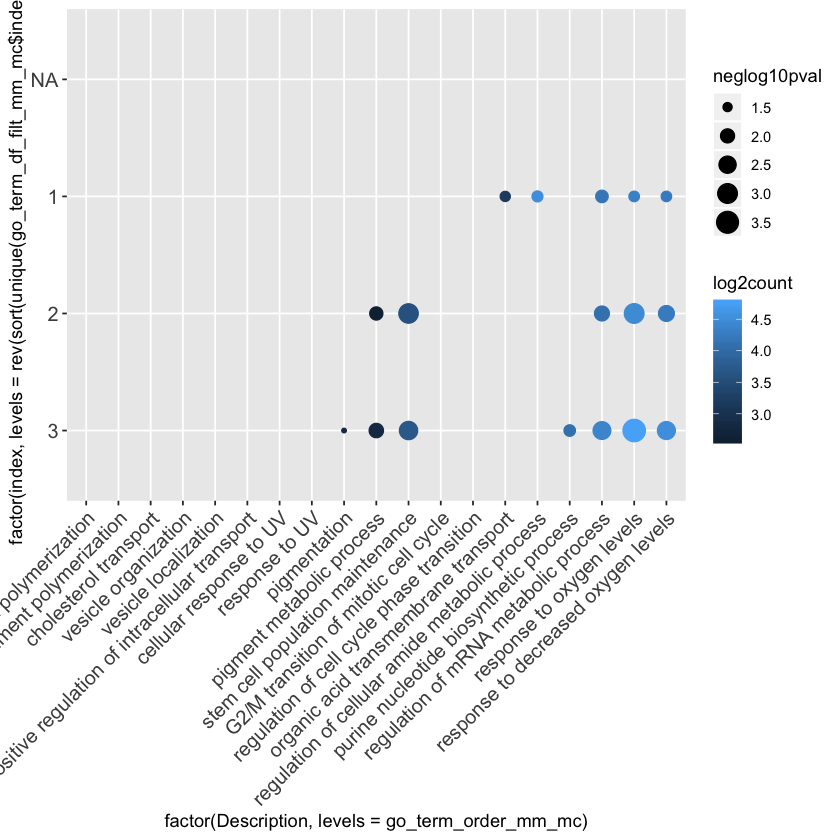

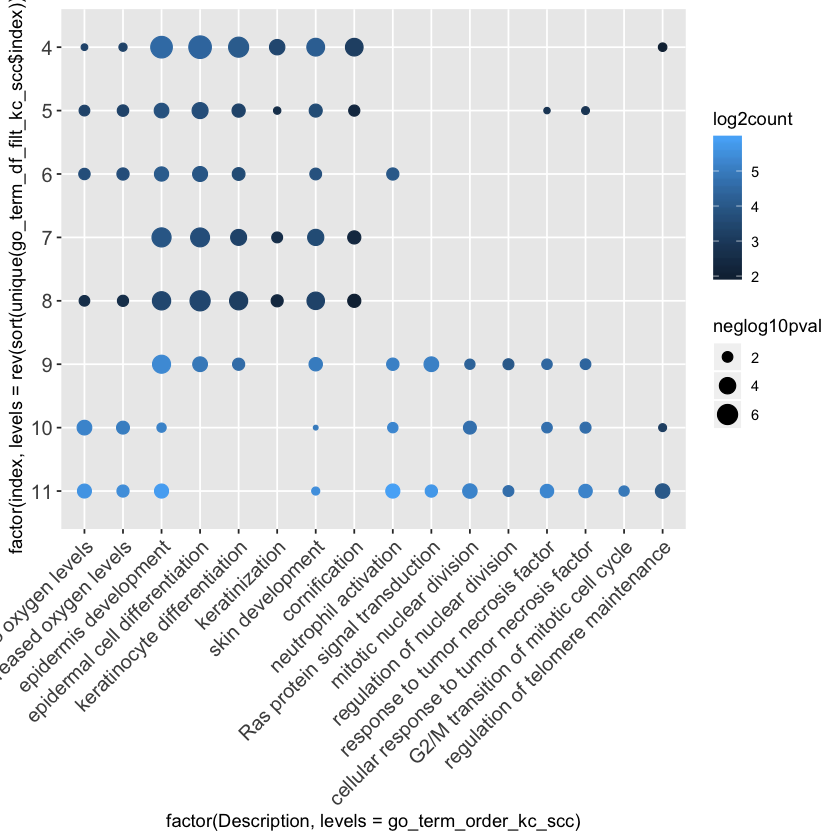

In [51]:
p = ggplot(go_term_df_filt_mm_mc, aes(x= factor(Description,levels=go_term_order_mm_mc),y=factor(index, levels=rev(sort(unique(go_term_df_filt_mm_mc$index)))),
                                          color=log2count, size=neglog10pval))+
    geom_point()+
#     geom_point(aes(size=score),colour="black",pch=21)+# I think this for bordering probably remove
    theme(axis.text.y = element_text(size=12),
          axis.text.x = element_text(size=12, angle = 45,hjust=1))
p 
ggsave(file = paste0(save_prefix, "go_term_df_long_", type_pre, "_mm_mc.eps"),height=5, width=7)
#

p = ggplot(go_term_df_filt_kc_scc, aes(x= factor(Description,levels=go_term_order_kc_scc),y=factor(index, levels=rev(sort(unique(go_term_df_filt_kc_scc$index)))),
                                          color=log2count, size=neglog10pval))+
    geom_point()+
#     geom_point(aes(size=score),colour="black",pch=21)+# I think this for bordering probably remove
    theme(axis.text.y = element_text(size=12),
          axis.text.x = element_text(size=12, angle = 45,hjust=1))
p 
ggsave(file = paste0(save_prefix, "go_term_df_long_", type_pre, "_kc_scc.eps"),height=5, width=7)
#

In [53]:
go_term_order_kc_scc

[1] "response to oxygen levels"                 
 [2] "response to decreased oxygen levels"       
 [3] "epidermis development"                     
 [4] "epidermal cell differentiation"            
 [5] "keratinocyte differentiation"              
 [6] "keratinization"                            
 [7] "skin development"                          
 [8] "cornification"                             
 [9] "neutrophil activation"                     
[10] "Ras protein signal transduction"           
[11] "mitotic nuclear division"                  
[12] "regulation of nuclear division"            
[13] "response to tumor necrosis factor"         
[14] "cellular response to tumor necrosis factor"
[15] "G2/M transition of mitotic cell cycle"     
[16] "regulation of telomere maintenance"